### Travel Python Notebook to Analyze Booking Data from Expedia and Airbnb Using Data from Kaggle

To Do List:
1. Load packages and data.
2. View data structure, summary statistics and plots.
3. Clean data, select and transform features.
4. Subset training data and fit models.
5. Check error rate on validation data and tune models.
6. Check model performance on test data.

Big Picture:
1. First perform a basic broad analysis.
2. Then improve by adding and trying new or more advanced data manipulation/feature engineering/modeling techniques from books or other resources.

In [91]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc

#from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [92]:
# Read Data
age_gender = pd.read_csv('./airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')
countries = pd.read_csv('./airbnb-recruiting-new-user-bookings/countries.csv')
#sessions = pd.read_csv('./airbnb-recruiting-new-user-bookings/sessions.csv')
train_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2.csv')
test_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/test_users.csv')

In [93]:
# Check User Summary Statistics Data Size and Structure
print(age_gender.shape)

# Check Year
print(age_gender['year'].unique())

# Check Duplicates
print(any(age_gender.duplicated()))
age_gender.head(10)

(420, 5)
[2015.]
False


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


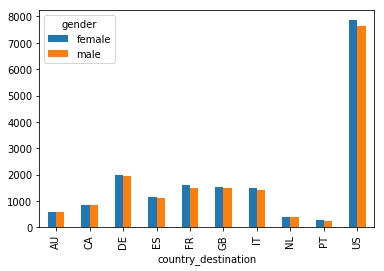

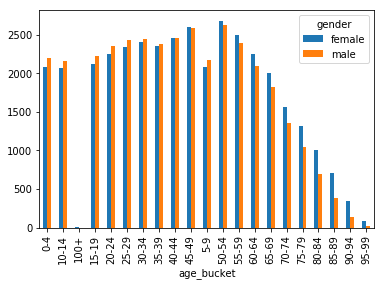

In [94]:
# Slicing by Gender
age_male = age_gender[age_gender.gender=='male']
age_female = age_gender[age_gender.gender=='female']

# Plot Data
#p1 = plt.bar(age_male['country_destination'], age_male['population_in_thousands'], facecolor='green')
#p2 = plt.bar(age_female['country_destination'], age_female['population_in_thousands'], facecolor='purple')
#plt.xlabel('Destination')
#plt.ylabel('Population')
#plt.title('Population in Each Destination by Gender')
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

age_gender.groupby(['country_destination', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()
age_gender.groupby(['age_bucket', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()

In [95]:
# Check Country Summary Statistics Data
print(countries.shape)
print(any(countries.duplicated()))
countries

(10, 7)
False


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


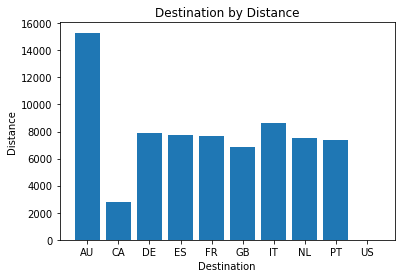

In [96]:
# Plot Destinations by Distance
p1 = plt.bar(countries['country_destination'], countries['distance_km'])
plt.xlabel('Destination')
plt.ylabel('Distance')
plt.title('Destination by Distance')
plt.show()

In [97]:
# Merge Tables Based on Destination (not sure if this is helpful)
pd.merge(age_gender, countries, on="country_destination").head(10)

,age_bucket,country_destination,gender,population_in_thousands,year,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,100+,AU,male,1.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
1,95-99,AU,male,9.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
2,90-94,AU,male,47.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
3,85-89,AU,male,118.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
4,80-84,AU,male,199.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
5,75-79,AU,male,298.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
6,70-74,AU,male,415.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
7,65-69,AU,male,574.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
8,60-64,AU,male,636.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
9,55-59,AU,male,714.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [98]:
# Check Out Training Data
print(train_users.shape)
train_users.info()
train_users.describe()
print(train_users.columns)
print(any(train_users.duplicated()))
train_users.head(3)

(213451, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
Index(['id', '

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US


In [99]:
# Number of Unique Languages
len(train_users['language'].unique().tolist())

# Replace Unknowns to NANs
train_users.replace('-unknown-', np.nan, inplace=True)

# Convert Dates
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['timestamp_first_active'] = pd.to_datetime((train_users.timestamp_first_active // 1000000), format='%Y%m%d')

In [100]:
# Check Percentage of NANs
train_users.isnull().sum() / train_users.shape[0]

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.448290
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.127739
country_destination        0.000000
dtype: float64

In [101]:
# Check for NA's and Outliers to Drop then Display Age Range
print(train_users['age'].isnull().values.any())
print(train_users['age'].isnull().sum())
train_noNA = train_users.dropna()[(train_users.age<100)&(train_users.age>18)]
print(min(train_noNA['age']), " to ", max(train_noNA['age']))
print(train_noNA.describe())

# Check Out Correlation
train_noNA.corr()

True
87990
19.0  to  99.0
                age   signup_flow
count  51358.000000  51358.000000
mean      36.243467      1.251412
std       11.152531      4.436987
min       19.000000      0.000000
25%       28.000000      0.000000
50%       33.000000      0.000000
75%       41.000000      0.000000
max       99.000000     25.000000


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,age,signup_flow
age,1.000000,-0.058396
signup_flow,-0.058396,1.000000


In [102]:
# Unique Categories of Selected Features in Training Data
#print("gender:", train_noNA['gender'].unique())
for k in range(1, train_noNA.shape[1]):
    print(eval('train_noNA.columns.values[k]'), ':', train_noNA[train_noNA.columns.values[k]].unique())

date_account_created : ['2010-09-28T00:00:00.000000000' '2011-12-05T00:00:00.000000000'
 '2010-01-02T00:00:00.000000000' ... '2014-06-27T00:00:00.000000000'
 '2014-06-29T00:00:00.000000000' '2014-06-30T00:00:00.000000000']
timestamp_first_active : ['2009-06-09T00:00:00.000000000' '2009-10-31T00:00:00.000000000'
 '2010-01-02T00:00:00.000000000' ... '2014-06-28T00:00:00.000000000'
 '2014-06-29T00:00:00.000000000' '2014-06-30T00:00:00.000000000']
date_first_booking : ['2010-08-02T00:00:00.000000000' '2012-09-08T00:00:00.000000000'
 '2010-01-05T00:00:00.000000000' ... '2015-06-25T00:00:00.000000000'
 '2015-06-29T00:00:00.000000000' '2015-06-28T00:00:00.000000000']
gender : ['FEMALE' 'MALE' 'OTHER']
age : [56. 42. 46. 47. 50. 36. 33. 29. 30. 26. 32. 31. 44. 52. 35. 57. 40. 34.
 69. 43. 39. 38. 63. 37. 45. 25. 60. 48. 51. 61. 64. 70. 28. 67. 55. 41.
 54. 65. 73. 19. 66. 68. 27. 49. 53. 75. 59. 79. 72. 58. 24. 98. 74. 62.
 87. 92. 23. 84. 71. 21. 22. 78. 86. 81. 95. 82. 77. 85. 83. 20. 91. 97

In [103]:
# Check Out Test Data (No Destination Given)
print(test_users.shape)
print(any(test_users.duplicated()))
#test_users.head(10)

# Replace Unknowns to NANs
test_users.replace('-unknown-', np.nan, inplace=True)

# Convert Dates
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['timestamp_first_active'] = pd.to_datetime((test_users.timestamp_first_active // 1000000), format='%Y%m%d')

(62096, 15)
False


In [104]:
# Check Percentage of NANs
test_users.isnull().sum() / train_users.shape[0]

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.290915
gender                     0.158313
age                        0.135282
signup_method              0.000000
signup_flow                0.000000
language                   0.000005
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000094
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.080243
dtype: float64

In [105]:
# Drop Column of All NA's (the column actually does not exist in training dataset)
test_users1 = test_users.drop(["date_first_booking"], axis=1)

print(test_users1['age'].isnull().values.any())
print(test_users1['age'].isnull().sum())
test_noNA = test_users1.dropna()[(test_users.age<100)&(test_users.age>18)]
print(min(test_noNA['age']), " to ", max(test_noNA['age']))
print(test_noNA.describe())

# Check Out Correlation
test_noNA.corr()

True
28876
19.0  to  99.0
                age   signup_flow
count  20518.000000  20518.000000
mean      34.697924      1.881909
std       11.546785      6.546361
min       19.000000      0.000000
25%       27.000000      0.000000
50%       31.000000      0.000000
75%       40.000000      0.000000
max       99.000000     25.000000


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,signup_flow
age,1.000000,-0.065339
signup_flow,-0.065339,1.000000


In [106]:
# Unique Categories of Selected Features in Test Data (test data contains more features than training data)
#print("gender:", test_noNA['gender'].unique())
for k in range(1, test_noNA.shape[1]):
    print(eval('test_noNA.columns.values[k]'), ':', test_noNA[test_noNA.columns.values[k]].unique())

date_account_created : ['2014-07-01T00:00:00.000000000' '2014-07-02T00:00:00.000000000'
 '2014-07-03T00:00:00.000000000' '2014-07-04T00:00:00.000000000'
 '2014-07-05T00:00:00.000000000' '2014-07-06T00:00:00.000000000'
 '2014-07-07T00:00:00.000000000' '2014-07-08T00:00:00.000000000'
 '2014-07-09T00:00:00.000000000' '2014-07-10T00:00:00.000000000'
 '2014-07-11T00:00:00.000000000' '2014-07-12T00:00:00.000000000'
 '2014-07-13T00:00:00.000000000' '2014-07-14T00:00:00.000000000'
 '2014-07-15T00:00:00.000000000' '2014-07-16T00:00:00.000000000'
 '2014-07-17T00:00:00.000000000' '2014-07-18T00:00:00.000000000'
 '2014-07-19T00:00:00.000000000' '2014-07-20T00:00:00.000000000'
 '2014-07-21T00:00:00.000000000' '2014-07-22T00:00:00.000000000'
 '2014-07-23T00:00:00.000000000' '2014-07-24T00:00:00.000000000'
 '2014-07-25T00:00:00.000000000' '2014-07-26T00:00:00.000000000'
 '2014-07-27T00:00:00.000000000' '2014-07-28T00:00:00.000000000'
 '2014-07-29T00:00:00.000000000' '2014-07-30T00:00:00.000000000'
 '

In [107]:
# Check if Training and Testing Features Match
#print("gender:", train_noNA['gender'].unique() in test_noNA['gender'].unique())
common = pd.DataFrame(np.zeros(max(test_noNA.shape[1],test_noNA.shape[1]))).astype('object')
#train_noNA[train_noNA.columns.values[4:15]]
#test_noNA[test_noNA.columns.values[3:14]]
for i in range(3, 14):
    for j in range(4, 15):
        if test_noNA.columns.values[i] == train_noNA.columns.values[j]:
            print(eval('test_noNA.columns.values[i]'), ':', set(train_noNA[train_noNA.columns.values[j]].unique()) == set(test_noNA[test_noNA.columns.values[i]].unique()))
            # Store Intersections
            common[0][i] = set(train_noNA[train_noNA.columns.values[j]].unique()) & set(test_noNA[test_noNA.columns.values[i]].unique())
            # Rename Rows
            common = common.rename(index = {eval('i'):test_noNA.columns.values[i]})
common

gender : True
age : False
signup_method : False
signup_flow : False
language : False
affiliate_channel : False
affiliate_provider : False
first_affiliate_tracked : True
signup_app : True
first_device_type : True
first_browser : False


,0
0,0
1,0
2,0
gender,"{FEMALE, OTHER, MALE}"
age,"{19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26...."
signup_method,"{basic, facebook, google}"
signup_flow,"{0, 8, 12, 21, 23, 25}"
language,"{da, pl, zh, tr, ja, el, sv, no, fr, es, ru, c..."
affiliate_channel,"{sem-brand, seo, sem-non-brand, remarketing, d..."
affiliate_provider,"{facebook-open-graph, facebook, google, bing, ..."


In [108]:
# Only Keep Intersection in Training and Testing Datasets
train_int = train_noNA
for i in range(4, 15):
    for j in range(3, 14):
        if train_noNA.columns.values[i] == common.index.values[j]:
            train_int = train_int[train_noNA[train_noNA.columns.values[i]].isin(common[0][common.index.values[j]])]
print(train_int.shape) # mush smaller now

test_int = test_noNA
for i in range(3, 14):
    for j in range(3, 14):
        if test_noNA.columns.values[i] == common.index.values[j]:
            test_int = test_int[test_noNA[test_noNA.columns.values[i]].isin(common[0][common.index.values[j]])]
print(test_int.shape)

# Check Again
for i in range(1, test_int.shape[1]):
    for j in range(1, train_int.shape[1]):
        if test_int.columns.values[i] == train_int.columns.values[j]:
            print(eval('test_int.columns.values[i]'), ':', set(train_int[train_int.columns.values[j]].unique()) == set(test_int[test_int.columns.values[i]].unique()))
            
#pd.concat([pd.DataFrame(train_int['first_browser'].unique()), pd.DataFrame(test_int['first_browser'].unique())], axis=1, sort=True)

C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(44382, 16)
(20510, 14)
date_account_created : False
timestamp_first_active : False
gender : True
age : True
signup_method : True
signup_flow : True
language : True
affiliate_channel : True
affiliate_provider : True
first_affiliate_tracked : True
signup_app : True
first_device_type : True
first_browser : True


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [109]:
# Create a Randomly Selected Smaller Subset of the Data to Work with Since the Original Data is Too Large for My Computer
#np.random.seed(12345)
#train_noNA_part = train_noNA.iloc[np.random.choice(len(train_noNA), size=50000, replace=True),:]
train_noNA_part = train_int
test_noNA = test_int

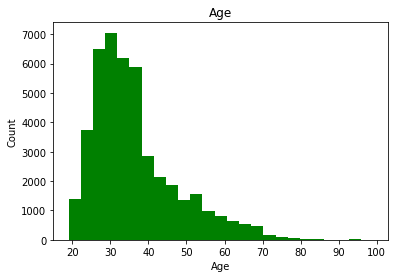

In [110]:
# Plot Age
plt.hist(train_noNA_part['age'], 25, facecolor='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

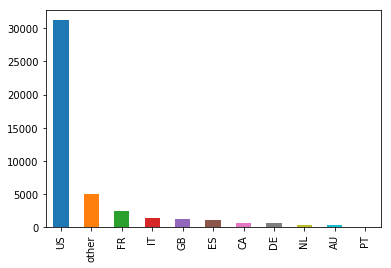

In [111]:
# Plot Top Destinations
train_noNA_part['country_destination'].value_counts().plot(kind='bar')

id  date_account_created  timestamp_first_active  \
age_group gender                                                       
18-20s    FEMALE  8130                  8130                    8130   
          MALE    5754                  5754                    5754   
          OTHER     31                    31                      31   
30s       FEMALE  9171                  9171                    9171   
          MALE    8619                  8619                    8619   
          OTHER     52                    52                      52   
40s       FEMALE  3242                  3242                    3242   
          MALE    3500                  3500                    3500   
          OTHER     18                    18                      18   
50s       FEMALE  1896                  1896                    1896   
          MALE    1645                  1645                    1645   
          OTHER     15                    15                      15   
60s       FEMALE  1002                  1002                    1002   
          MALE     805                   805                     805   
          OTHER      2                     2                       2   
70s+      FEMALE   252                   252                     252   
          MALE     248                   248                     248   

                  date_first_booking   age  signup_method  signup_flow  \
age_group gender                                                         
18-20s    FEMALE                8130  8130           8130         8130   
          MALE                  5754  5754           5754         5754   
          OTHER                   31    31             31           31   
30s       FEMALE                9171  9171           9171         9171   
          MALE                  8619  8619           8619         8619   
          OTHER                   52    52             52           52   
40s       FEMALE                3242  3242           3242         3242   
          MALE                  3500  3500           3500         3500   
          OTHER                   18    18             18           18   
50s       FEMALE                1896  1896           1896         1896   
          MALE                  1645  1645           1645         1645   
          OTHER                   15    15             15           15   
60s       FEMALE                1002  1002           1002         1002   
          MALE                   805   805            805          805   
          OTHER                    2     2              2            2   
70s+      FEMALE                 252   252            252          252   
          MALE                   248   248            248          248   

                  language  affiliate_channel  affiliate_provider  \
age_group gender                                                    
18-20s    FEMALE      8130               8130                8130   
          MALE        5754               5754                5754   
          OTHER         31                 31                  31   
30s       FEMALE      9171               9171                9171   
          MALE        8619               8619                8619   
          OTHER         52                 52                  52   
40s       FEMALE      3242               3242                3242   
          MALE        3500               3500                3500   
          OTHER         18                 18                  18   
50s       FEMALE      1896               1896                1896   
          MALE        1645               1645                1645   
          OTHER         15                 15                  15   
60s       FEMALE      1002               1002                1002   
          MALE         805                805                 805   
          OTHER          2                  2                   2   
70s+      FEMALE       252                252                 252   
  

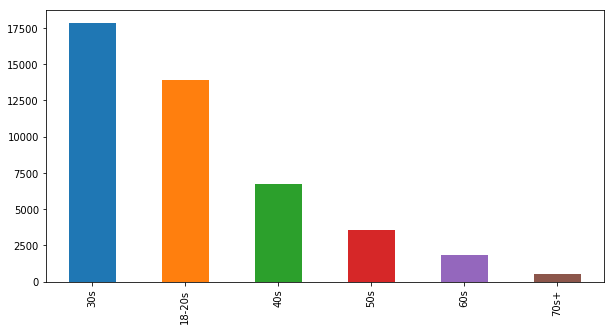

In [112]:
# Age Groups
train_age = train_noNA_part
train_age.loc[(train_age['age'] < 30) & (train_age['age'] >= 18), 'age_group'] = '18-20s'
train_age.loc[(train_age['age'] < 40) & (train_age['age'] >= 30), 'age_group'] = '30s'
train_age.loc[(train_age['age'] < 50) & (train_age['age'] >= 40), 'age_group'] = '40s'
train_age.loc[(train_age['age'] < 60) & (train_age['age'] >= 50), 'age_group'] = '50s'
train_age.loc[(train_age['age'] < 70) & (train_age['age'] >= 60), 'age_group'] = '60s'
train_age.loc[(train_age['age'] < 120) & (train_age['age'] >= 70), 'age_group'] = '70s+'
train_age['age_group'].value_counts().plot(kind='bar', figsize = (10,5))
train_age.groupby(['age_group', 'gender']).count()

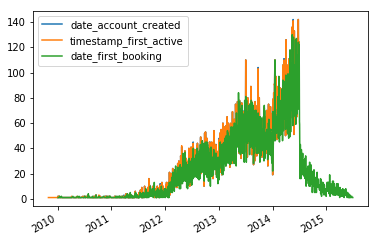

In [113]:
# Plot Times
t1 = train_noNA_part.date_account_created.value_counts()
t2 = train_noNA_part.timestamp_first_active .value_counts()
t3 = train_noNA_part.date_first_booking .value_counts()
t1.plot(kind = 'line')
t2.plot(kind = 'line')
t3.plot(kind = 'line')
plt.legend()

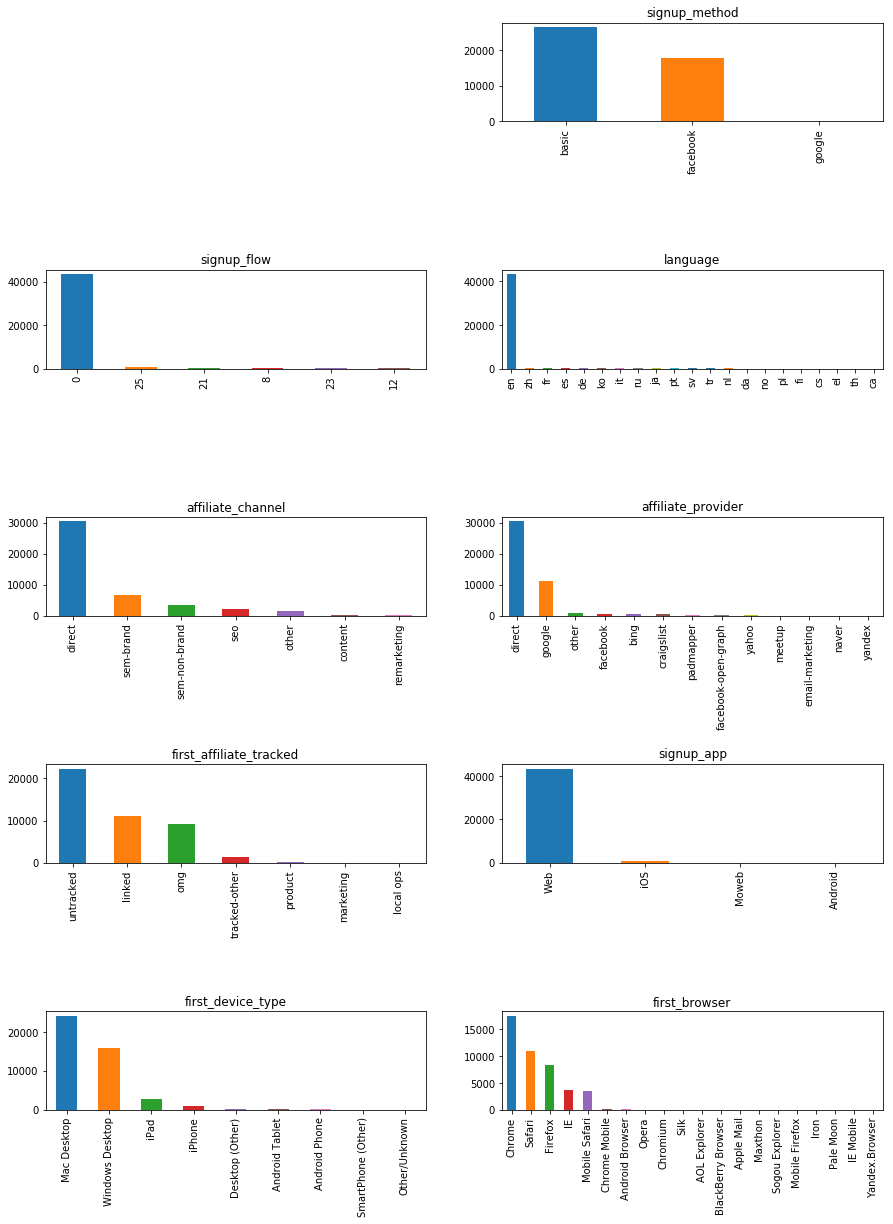

In [114]:
# Count Frequency
train_noNA_part.groupby('first_device_type').count()
#train_noNA_part['first_device_type'].value_counts().plot(kind='bar')

fig = plt.figure()
fig.set_size_inches(15, 20)
plt.subplots_adjust(hspace=1.5)
for k in range(6,15):
    ax = fig.add_subplot(5, 2, k-4)
    train_noNA_part[train_noNA_part.columns.values[k]].value_counts().plot(kind='bar', ax=ax)
    plt.title(train_noNA_part.columns.values[k])

In [115]:
train_noNA_part[train_noNA_part.columns.values[5:15]].head(5)

# Separate into Continuous and Categorical Predicators
train_noNA_cat = train_noNA_part[train_noNA_part.columns.values[[np.r_[6:7, 8:15]]]]
train_noNA_con = train_noNA_part[train_noNA_part.columns.values[[5,7]]]

Y = train_noNA_part['country_destination']
# Transform into Dummy Variables of 0 or 1 (stacked)
train_noNA_cat = pd.get_dummies(data = train_noNA_cat, drop_first = True)
Y = pd.get_dummies(data = Y, drop_first = True)
X = pd.concat([pd.DataFrame(train_noNA_cat), pd.DataFrame(train_noNA_con)], axis = 1)

C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [21]:
# Fit Linear Regression (create validation set within training set)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = .20, random_state = 10)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression for categorical response having 0 or 1
Y_pred = (Y_pred > 0.5) # wrong
print(accuracy_score(Y_valid, Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid, Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.7047902618442946
Precision: 0.5004544746385609 Recall: 0.7091998590059923 F1: 0.5868159737554848


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
# Fit Logistic Regression (can only fit when response variable is 1-D)
destination_name = 'US'
model = LogisticRegression(fit_intercept=True, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, Y_train[destination_name])
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression
Y_pred = (Y_pred > 0.5)
print(accuracy_score(Y_valid[destination_name], Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid[destination_name], Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1) # no data points are classified as positive?
#roc_curve(Y_pred,Y_valid[destination_name])

0.705228128557667
Precision: 0.49734671330894936 Recall: 0.705228128557667 F1: 0.5833198561293028


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Fit Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid)
print(accuracy_score(Y_valid, Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid, Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.609773185042473
Precision: 0.5218331558224336 Recall: 0.613412054987663 F1: 0.5561746671983522


In [35]:
# Fit Naive Bayes (can only fit when response variable is 1-D)
destination_name = 'US'
model = GaussianNB()
model.fit(X_train, Y_train[destination_name])
Y_pred = model.predict(X_valid)
print(accuracy_score(Y_valid[destination_name], Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid[destination_name], Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.3229704877835187
Precision: 0.6503397966491116 Recall: 0.3229704877835187 F1: 0.20566381973542316


In [61]:
# Fit K-Nearest Neighbors (sort of slow)
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid)
print(accuracy_score(Y_valid, Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid, Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.6710745249146159
Precision: 0.5016898560879319 Recall: 0.6745682058512513 F1: 0.5754247933605346


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
# Construct Elbow Curve for KNN to Select K
elbow = np.empty(20)
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_valid)
    Y_pred = (Y_pred > 0.5)
    elbow[k-1] = accuracy_score(Y_valid, Y_pred)
elbow

array([0.51449339, 0.34933006, 0.57115334, 0.47552325, 0.60171644,
       0.54102811, 0.62755057, 0.57754619, 0.64121202, 0.60916017,
       0.64944391, 0.6261494 , 0.6619669 , 0.6462037 , 0.67107452,
       0.6563622 , 0.67562834, 0.66117874, 0.68105789, 0.67046151])

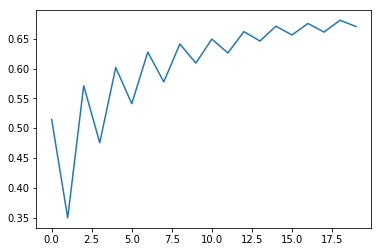

In [60]:
# Plot Elbow Curve for KNN
plt.plot(np.arange(0,20), elbow)

In [65]:
# Fit Support Vector Machine (very time consuming)
model = SVC(gamma='auto')
model.fit(X_train, Y_train[destination_name])
Y_pred = model.predict(X_valid)
Y_pred = (Y_pred > 0.5)
print(accuracy_score(Y_valid[destination_name], Y_pred))
precision, recall, F1, support  = precision_recall_fscore_support(Y_valid[destination_name], Y_pred, average='weighted')
print('Precision:', precision, 'Recall:', recall, 'F1:', F1)

0.705228128557667
Precision: 0.49734671330894936 Recall: 0.705228128557667 F1: 0.5833198561293028


C:\Users\yongy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
# Test Model on Test Dataset
test_noNA[test_noNA.columns.values[4:14]].head(5)

# Separate into Continuous and Categorical Predicators
test_noNA_cat = test_noNA[test_noNA.columns.values[[np.r_[5:6, 7:14]]]]
test_noNA_con = test_noNA[test_noNA.columns.values[[4,6]]]

# Transform into Dummy Variables of 0 or 1 (stacked)
test_noNA_cat = pd.get_dummies(data = test_noNA_cat, drop_first = True)
X_test = pd.concat([pd.DataFrame(test_noNA_cat), pd.DataFrame(test_noNA_con)], axis = 1)
Y_test = model.predict(X_test)
#Y_test = (Y_test > 0.5)
pd.DataFrame(Y_test)

C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0


In [607]:
# Use StatsModels to Display Model Summary
import statsmodels.api as sm
mod = sm.GLS(Y_train[destination_name], X_train, family = sm.families.Gaussian())
reg = mod.fit()
print(reg.summary())

                            GLS Regression Results                            
Dep. Variable:                     US   R-squared:                    -175.876
Model:                            GLS   Adj. R-squared:               -176.190
Method:                 Least Squares   F-statistic:                    -559.7
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               1.00
Time:                        20:06:41   Log-Likelihood:                -28645.
No. Observations:               45676   AIC:                         5.745e+04
Df Residuals:                   45595   BIC:                         5.816e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Where will a new guest book their first travel experience?

Date/Time may indicate seasons suitable for travel to certain destinations.
Signup method/device type may indicate personal traits.
Language may indicate travel preference.

Notes for next time: fix Logistic Regression, plot ROC curve, read more